# Notebook for testing remote providers
This notebook is a template for the testing steps of writing a remote provider to wrap an external API

# Part 0: converting bbox to list of county names

In [1]:
import geopandas as gpd
from shapely import geometry

class Boundaries:
    def __init__(self, path: str):
        self.df = gpd.read_parquet(path)

    def intersects(self, geom) -> gpd.GeoDataFrame:
        idx = self.df.intersects(geom)
        return self.df.copy().loc[idx]


In [2]:
states_path = '/mnt/c/Users/16105/Documents/projects/boson_remote_providers/nass_quickstats_remote_provider/data/states.geoparquet'
counties_path = '/mnt/c/Users/16105/Documents/projects/boson_remote_providers/nass_quickstats_remote_provider/data/counties.geoparquet'

In [3]:
counties = Boundaries(counties_path)
states = Boundaries(states_path)

In [4]:
states.df

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ..."
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ..."
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00257 36.52659, -103.00219 36.6..."
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ..."
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.64320 38.16909, -82.64300 38.169..."
5,22,01629543,0400000US22,22,LA,Louisiana,00,111897594374,23753621895,"MULTIPOLYGON (((-88.86770 29.86155, -88.86566 ..."
6,26,01779789,0400000US26,26,MI,Michigan,00,146600952990,103885855702,"MULTIPOLYGON (((-83.19159 42.03537, -83.18993 ..."
7,25,00606926,0400000US25,25,MA,Massachusetts,00,20205125364,7129925486,"MULTIPOLYGON (((-70.23405 41.28565, -70.22361 ..."
8,16,01779783,0400000US16,16,ID,Idaho,00,214049787659,2391722557,"POLYGON ((-117.24267 44.39655, -117.23484 44.3..."
9,12,00294478,0400000US12,12,FL,Florida,00,138949136250,31361101223,"MULTIPOLYGON (((-80.17628 25.52505, -80.17395 ..."


In [5]:
counties.df

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,21,007,00516850,0500000US21007,21007,Ballard,06,639387454,69473325,"POLYGON ((-89.18137 37.04630, -89.17938 37.053..."
1,21,017,00516855,0500000US21017,21017,Bourbon,06,750439351,4829777,"POLYGON ((-84.44266 38.28324, -84.44114 38.283..."
2,21,031,00516862,0500000US21031,21031,Butler,06,1103571974,13943044,"POLYGON ((-86.94486 37.07341, -86.94346 37.074..."
3,21,065,00516879,0500000US21065,21065,Estill,06,655509930,6516335,"POLYGON ((-84.12662 37.64540, -84.12483 37.646..."
4,21,069,00516881,0500000US21069,21069,Fleming,06,902727151,7182793,"POLYGON ((-83.98428 38.44549, -83.98246 38.450..."
...,...,...,...,...,...,...,...,...,...,...
3228,31,073,00835858,0500000US31073,31073,Gosper,06,1186616237,11831826,"POLYGON ((-100.09510 40.43866, -100.08937 40.4..."
3229,39,075,01074050,0500000US39075,39075,Holmes,06,1094405866,3695230,"POLYGON ((-82.22066 40.66758, -82.19327 40.667..."
3230,48,171,01383871,0500000US48171,48171,Gillespie,06,2740719114,9012764,"POLYGON ((-99.30400 30.49983, -99.28234 30.499..."
3231,55,079,01581100,0500000US55079,55079,Milwaukee,06,625440563,2455383635,"POLYGON ((-88.06959 42.86726, -88.06959 42.872..."


In [58]:
import urllib

In [57]:
import cachetools

ModuleNotFoundError: No module named 'cachetools'

In [14]:
from geodesic.mapping import BBoxSelector

b = BBoxSelector()

In [7]:
b

BBoxSelector(center=[0.0, 0.0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'z…

In [8]:
bbox = b.bbox

In [9]:
#bbox = [-90.806632,24.634217,-71.119132,45.910790]
bbox_geom = geometry.box(*bbox)

In [10]:
counties_df = counties.intersects(bbox_geom)
#counties_df = counties.df
counties_df['STATEFP'] = counties_df['STATEFP'].str.strip()

In [11]:
states_df = states.intersects(bbox_geom)

In [12]:
states_df = states_df.loc[:, ['STATEFP', 'NAME']]
states_df['STATEFP'] = states_df['STATEFP'].str.strip()

In [13]:
counties_df.set_index('STATEFP', inplace=True)

In [14]:
states_df.set_index('STATEFP', inplace=True)

In [15]:
joined = counties_df.join(states_df, rsuffix='_state', lsuffix='_county')

In [21]:
joined.rename(columns={'NAME_county': 'county_name', 'NAME_state':'state_name'}, inplace=True)
joined['state_name'] = joined['state_name'].str.strip().str.upper()
joined['county_name'] = joined['county_name'].str.strip().str.upper()

In [22]:
joined = joined.sort_values(by=['COUNTYNS'])

In [23]:
base = joined.reset_index().set_index(['state_name', 'county_name']).loc[:, ['geometry', 'COUNTYNS']]

In [24]:

base

geometry  \
state_name   county_name                                                       
NEW JERSEY   BURLINGTON    POLYGON ((-75.05965 39.99215, -75.05809 39.997...   
             CAMDEN        POLYGON ((-75.13730 39.88997, -75.13541 39.893...   
             GLOUCESTER    POLYGON ((-75.42830 39.78437, -75.42168 39.787...   
PENNSYLVANIA CHESTER       MULTIPOLYGON (((-75.59129 39.84044, -75.58917 ...   
             DELAWARE      POLYGON ((-75.60153 39.85643, -75.59641 39.862...   
             PHILADELPHIA  POLYGON ((-75.28027 39.97496, -75.27648 39.976...   
             MONTGOMERY    POLYGON ((-75.69595 40.24236, -75.68629 40.254...   

                           COUNTYNS  
state_name   county_name             
NEW JERSEY   BURLINGTON    00882272  
             CAMDEN        00882273  
             GLOUCESTER    00882277  
PENNSYLVANIA CHESTER       01209174  
             DELAWARE      01209177  
             PHILADELPHIA  01209187  
             MONTGOMERY    01213680

In [48]:
import urllib.parse

request_params = {
    "commodity_desc": "CORN",
    "year":2020,
    "state_name":"PENNSYLVANIA",
    "county_name":"MONTGOMERY",
    "key": options["api_key"],
}
# Perform the AirNow API data request
url = "https://quickstats.nass.usda.gov/api/api_GET/"
encoded_params = urllib.parse.urlencode(request_params)
response = requests.get(url, params=encoded_params)
response.raise_for_status()

response.json()

{'data': [{'state_fips_code': '42',
   'asd_desc': 'SOUTHEASTERN',
   'county_name': 'MONTGOMERY',
   'begin_code': '00',
   'region_desc': '',
   'state_ansi': '42',
   'country_code': '9000',
   'class_desc': 'ALL CLASSES',
   'group_desc': 'FIELD CROPS',
   'util_practice_desc': 'ALL UTILIZATION PRACTICES',
   'year': 2020,
   'domain_desc': 'TOTAL',
   'Value': '5,300',
   'sector_desc': 'CROPS',
   'asd_code': '90',
   'location_desc': 'PENNSYLVANIA, SOUTHEASTERN, MONTGOMERY',
   'zip_5': '',
   'week_ending': '',
   'agg_level_desc': 'COUNTY',
   'country_name': 'UNITED STATES',
   'county_code': '091',
   'freq_desc': 'ANNUAL',
   'source_desc': 'SURVEY',
   'load_time': '2024-02-23 15:00:00.000',
   'reference_period_desc': 'YEAR',
   'short_desc': 'CORN - ACRES PLANTED',
   'unit_desc': 'ACRES',
   'state_name': 'PENNSYLVANIA',
   'congr_district_code': '',
   'end_code': '00',
   'statisticcat_desc': 'AREA PLANTED',
   'watershed_desc': '',
   'watershed_code': '00000000',
  

In [51]:
type(base.loc[('PENNSYLVANIA', 'MONTGOMERY'), 'geometry'])

shapely.geometry.polygon.Polygon

In [55]:
gdf = gpd.GeoDataFrame(data=response.json()['data'], geometry=[base.loc[('PENNSYLVANIA', 'CHESTER'),'geometry']] * len(response.json()['data']))

In [56]:
gdf.iloc[0]

state_fips_code                                                         42
asd_desc                                                      SOUTHEASTERN
county_name                                                     MONTGOMERY
begin_code                                                              00
region_desc                                                               
state_ansi                                                              42
country_code                                                          9000
class_desc                                                     ALL CLASSES
group_desc                                                     FIELD CROPS
util_practice_desc                               ALL UTILIZATION PRACTICES
year                                                                  2020
domain_desc                                                          TOTAL
Value                                                                5,300
sector_desc              

In [37]:
gdf.set_index(['state_alpha', 'county_name'], inplace=True)

In [38]:
gdf.join(base['geometry'])

asd_desc state_fips_code begin_code  \
county_name state_alpha state_name                                              
CHESTER     PA          PENNSYLVANIA  SOUTHEASTERN              42         00   
                        PENNSYLVANIA  SOUTHEASTERN              42         00   
                        PENNSYLVANIA  SOUTHEASTERN              42         00   
                        PENNSYLVANIA  SOUTHEASTERN              42         00   
                        PENNSYLVANIA  SOUTHEASTERN              42         00   
                        PENNSYLVANIA  SOUTHEASTERN              42         00   
                        PENNSYLVANIA  SOUTHEASTERN              42         00   

                                       group_desc   class_desc country_code  \
county_name state_alpha state_name                                            
CHESTER     PA          PENNSYLVANIA  FIELD CROPS  ALL CLASSES         9000   
                        PENNSYLVANIA  FIELD CROPS  ALL CLASSES         9000   
                        PENNSYLVANIA  FIELD CROPS  ALL CLASSES         9000   
                        PENNSYLVANIA  FIELD CROPS  ALL CLASSES         9000   
                        PENNSYLVANIA  FIELD CROPS  ALL CLASSES         9000   
                        PENNSYLVANIA  FIELD CROPS  ALL CLASSES         9000   
                        PENNSYLVANIA  FIELD CROPS  ALL CLASSES         9000   

                                     state_ansi region_desc zip_5  \
county_name state_alpha state_name                                  
CHESTER     PA          PENNSYLVANIA         42                     
                        PENNSYLVANIA         42                     
                        PENNSYLVANIA         42                     
                        PENNSYLVANIA         42                     
                        PENNSYLVANIA         42                     
                        PENNSYLVANIA         42                     
                        PENNSYLVANIA         42                     

                                                            location_desc  \
county_name state_alpha state_name                                          
CHESTER     PA          PENNSYLVANIA  PENNSYLVANIA, SOUTHEASTERN, CHESTER   
                        PENNSYLVANIA  PENNSYLVANIA, SOUTHEASTERN, CHESTER   
                        PENNSYLVANIA  PENNSYLVANIA, SOUTHEASTERN, CHESTER   
                        PENNSYLVANIA  PENNSYLVANIA, SOUTHEASTERN, CHESTER   
                        PENNSYLVANIA  PENNSYLVANIA, SOUTHEASTERN, CHESTER   
                        PENNSYLVANIA  PENNSYLVANIA, SOUTHEASTERN, CHESTER   
                        PENNSYLVANIA  PENNSYLVANIA, SOUTHEASTERN, CHESTER   

                                      ... congr_district_code    state_name  \
county_name state_alpha state_name    ...                                     
CHESTER     PA          PENNSYLVANIA  ...                      PENNSYLVANIA   
                        PENNSYLVANIA  ...                      PENNSYLVANIA   
                        PENNSYLVANIA  ...                      PENNSYLVANIA   
                        PENNSYLVANIA  ...                      PENNSYLVANIA   
                        PENNSYLVANIA  ...                      PENNSYLVANIA   
                        PENNSYLVANIA  ...                      PENNSYLVANIA   
                        PENNSYLVANIA  ...                      PENNSYLVANIA   

                                                                         short_desc  \
county_name state_alpha state_name                                                    
CHESTER     PA          PENNSYLVANIA                           CORN - ACRES PLANTED   
                        PENNSYLVANIA                  CORN, GRAIN - ACRES HARVESTED   
                        PENNSYLVANIA       CORN, GRAIN - PRODUCTION, MEASURED IN BU   
                        PENNSYLVANIA     CORN, GRAIN - YIELD, MEASURED IN BU / ACRE   
                        PENNSYLVANIA              

# Part 1: Getting a feel for the remote API
This section walks through sending and receiving ordinary python requests to the AirNow API. You can adapt this section to whatever API you are working on. The key point is to understand what parameters the API accepts, and what it sends back in response.

In [56]:
api_params = {'source_desc': 'SURVEY', 'commodity_desc': 'CORN', 'key': '6F441079-980F-3F40-BE4B-F5F17B7ABED3', 'agg_level_desc':'COUNTY', 'state_fips_code': '48', 'sector_desc': 'CROPS', 'year': 2023}

In [57]:
response = requests.get(url, params=api_params)

In [58]:
response.json()

{'data': [{'congr_district_code': '',
   'Value': '112,000',
   'util_practice_desc': 'ALL UTILIZATION PRACTICES',
   'watershed_desc': '',
   'watershed_code': '00000000',
   'county_name': 'DALLAM',
   'state_name': 'TEXAS',
   'end_code': '00',
   'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
   'statisticcat_desc': 'AREA PLANTED',
   'sector_desc': 'CROPS',
   'reference_period_desc': 'YEAR',
   'state_fips_code': '48',
   'short_desc': 'CORN - ACRES PLANTED',
   'domain_desc': 'TOTAL',
   'commodity_desc': 'CORN',
   'asd_code': '11',
   'country_name': 'UNITED STATES',
   'week_ending': '',
   'asd_desc': 'NORTHERN HIGH PLAINS',
   'CV (%)': '0.9',
   'unit_desc': 'ACRES',
   'country_code': '9000',
   'county_code': '111',
   'domaincat_desc': 'NOT SPECIFIED',
   'group_desc': 'FIELD CROPS',
   'class_desc': 'ALL CLASSES',
   'region_desc': '',
   'year': 2023,
   'load_time': '2024-02-23 15:00:00.000',
   'begin_code': '00',
   'location_desc': 'TEXAS, NORTHERN HIGH PLAINS

In [32]:
import requests
import geodesic
import geopandas as gpd

In [30]:
url = "https://quickstats.nass.usda.gov/api/api_GET/"
api_key = "6F441079-980F-3F40-BE4B-F5F17B7ABED3"

In [27]:
options = {
        "url": url,
    
        "bbox": ["-90.806632,24.634217,-71.119132,45.910790"],
        "api_key": api_key,
    }


In [18]:

request_params = {
    #"startdate": options["start_date"] + "T" + options["start_hour_utc"],
    #"enddate": options["end_date"] + "T" + options["end_hour_utc"],
    "commodity_desc": "CORN",
    "year":2020,
    "state_alpha":"VA",
    "key": options["api_key"],
 }

try:
    # Request NASS Quickstats data
    print("Requesting NASS Quickstats data...")
    
    # Perform the AirNow API data request
    response = requests.get(url, params=request_params)
    res = requests.get(url, params={"key": api_key, "source_desc": "CENSUS", "commodity_desc": "CORN", "year": 2022, "agg_level_desc": "ZIP CODE", "zip_5": 19701})
    response.raise_for_status()
except:
    print("error")



Requesting NASS Quickstats data...


In [23]:
response.json()

{'data': [{'begin_code': '00',
   'county_name': 'CULPEPER',
   'state_fips_code': '51',
   'asd_desc': 'NORTHERN',
   'sector_desc': 'CROPS',
   'asd_code': '20',
   'util_practice_desc': 'ALL UTILIZATION PRACTICES',
   'Value': '10,800',
   'domain_desc': 'TOTAL',
   'year': 2020,
   'zip_5': '',
   'location_desc': 'VIRGINIA, NORTHERN, CULPEPER',
   'country_code': '9000',
   'state_ansi': '51',
   'class_desc': 'ALL CLASSES',
   'group_desc': 'FIELD CROPS',
   'region_desc': '',
   'freq_desc': 'ANNUAL',
   'load_time': '2024-02-23 15:00:00.000',
   'reference_period_desc': 'YEAR',
   'source_desc': 'SURVEY',
   'agg_level_desc': 'COUNTY',
   'country_name': 'UNITED STATES',
   'week_ending': '',
   'county_code': '047',
   'domaincat_desc': 'NOT SPECIFIED',
   'prodn_practice_desc': 'ALL PRODUCTION PRACTICES',
   'CV (%)': '0.4',
   'commodity_desc': 'CORN',
   'state_alpha': 'VA',
   'county_ansi': '047',
   'state_name': 'VIRGINIA',
   'congr_district_code': '',
   'short_desc':

In [16]:
for record in response.json()['data']:
    print(record['agg_level_desc'])

COUNTY
COUNTY
COUNTY
COUNTY
COUNTY
COUNTY
COUNTY
COUNTY
COUNTY
COUNTY
COUNTY
COUNTY
COUNTY
COUNTY
COUNTY
COUNTY
COUNTY
COUNTY
COUNTY
COUNTY
COUNTY
COUNTY
COUNTY
COUNTY
COUNTY
COUNTY
COUNTY
COUNTY
COUNTY
COUNTY
COUNTY
COUNTY
COUNTY
COUNTY
COUNTY
COUNTY
COUNTY
COUNTY
COUNTY
COUNTY
COUNTY
COUNTY
COUNTY
COUNTY
COUNTY
COUNTY
COUNTY
COUNTY
COUNTY
STATE
STATE
STATE
STATE
STATE
STATE
STATE
STATE
STATE
STATE
STATE
STATE
STATE
STATE
STATE
STATE
STATE
STATE
STATE
STATE
STATE
STATE
STATE
STATE
STATE
STATE
STATE
STATE
STATE
STATE
STATE
STATE
STATE
STATE
STATE
STATE
STATE
STATE
STATE
STATE
STATE
STATE
STATE
STATE
STATE
STATE
STATE
STATE
STATE
STATE
STATE
STATE
STATE
STATE
STATE
STATE
STATE
STATE
STATE
STATE
STATE
STATE
STATE
STATE
STATE
STATE
STATE
STATE
STATE
STATE
STATE
STATE
STATE
STATE
STATE
STATE
STATE
STATE
STATE
STATE
STATE
STATE
STATE
STATE
STATE
STATE
STATE
STATE
STATE
STATE
STATE
STATE
STATE
STATE
STATE
STATE
STATE
STATE
STATE
STATE
STATE
STATE
STATE
STATE
STATE
STATE
STATE
STATE
STATE
STA

In [27]:
for line in response.iter_lines():
    print(line)

b'{"data":[{"short_desc":"CORN - ACRES PLANTED","week_ending":"","watershed_desc":"","source_desc":"SURVEY","county_ansi":"047","congr_district_code":"","region_desc":"","country_code":"9000","CV (%)":"0.4","commodity_desc":"CORN","class_desc":"ALL CLASSES","end_code":"00","freq_desc":"ANNUAL","load_time":"2024-02-23 15:00:00.000","domaincat_desc":"NOT SPECIFIED","unit_desc":"ACRES","state_name":"VIRGINIA","Value":"10,800","location_desc":"VIRGINIA, NORTHERN, CULPEPER","group_desc":"FIELD CROPS","state_fips_code":"51","asd_code":"20","sector_desc":"CROPS","asd_desc":"NORTHERN","util_practice_desc":"ALL UTILIZATION PRACTICES","begin_code":"00","country_name":"UNITED STATES","statisticcat_desc":"AREA PLANTED","reference_period_desc":"YEAR","agg_level_desc":"COUNTY","state_alpha":"VA","state_ansi":"51","prodn_practice_desc":"ALL PRODUCTION PRACTICES","county_code":"047","county_name":"CULPEPER","domain_desc":"TOTAL","year":2020,"watershed_code":"00000000","zip_5":""},{"prodn_practice_desc

In [20]:
response.json()

{'count': 702}

### Examine the response

In [ ]:
response.json()

This part is not necessary, but it may be easier to visualize the results this way

In [19]:
features=[]
for res in response.json():
    feat = geodesic.Feature(geometry= {"type": "Point", "coordinates": [res['Latitude'], res['Longitude']]},
                            properties=res,
                            datetime= datetime.strptime(res['UTC'], "%Y-%m-%dT%H:%M"))
    features.append(feat)


                                       

In [20]:
fc = geodesic.FeatureCollection(features=features)

In [21]:
fc.gdf

,Latitude,Longitude,UTC,Parameter,Unit,AQI,Category,datetime,geometry
0,29.763900,-90.765300,2024-06-07T13:00,PM2.5,UG/M3,59,2,2024-06-07T13:00:00+00:00,POINT (29.76390 -90.76530)
1,29.763900,-90.765300,2024-06-07T13:00,OZONE,PPB,13,1,2024-06-07T13:00:00+00:00,POINT (29.76390 -90.76530)
2,33.750833,-90.734167,2024-06-07T13:00,OZONE,PPB,30,1,2024-06-07T13:00:00+00:00,POINT (33.75083 -90.73417)
3,33.750833,-90.734167,2024-06-07T13:00,PM2.5,UG/M3,19,1,2024-06-07T13:00:00+00:00,POINT (33.75083 -90.73417)
4,38.490200,-90.705200,2024-06-07T13:00,OZONE,PPB,17,1,2024-06-07T13:00:00+00:00,POINT (38.49020 -90.70520)
...,...,...,...,...,...,...,...,...,...
1136,45.373300,-71.251400,2024-06-07T13:00,OZONE,PPB,21,1,2024-06-07T13:00:00+00:00,POINT (45.37330 -71.25140)
1137,45.373300,-71.251400,2024-06-07T13:00,PM2.5,UG/M3,7,1,2024-06-07T13:00:00+00:00,POINT (45.37330 -71.25140)
1138,44.308132,-71.217639,2024-06-07T13:00,OZONE,PPB,23,1,2024-06-07T13:00:00+00:00,POINT (44.30813 -71.21764)
1139,41.683300,-71.169701,2024-06-07T13:00,OZONE,PPB,28,1,2024-06-07T13:00:00+00:00,POINT (41.68330 -71.16970)


## Part 2: Testing the deployed remote provider as a Boson Dataset

In [1]:
import geodesic
from geodesic.cql import CQLFilter
from datetime import datetime as _datetime
from geodesic import mapping

In [2]:
proj_name = 'remote-provider-test'
proj = geodesic.Project(name=proj_name, alias="Testing proj for remote provider")
proj.create()

In [ ]:
def create_nass_dataset(config):
    url = 'https://nass-quickstats-remote-provider-815921581707.us-central1.run.app'
    

In [3]:
geodesic.set_active_project(proj)

{'name': 'remote-provider-test',
 'alias': 'Testing proj for remote provider',
 'uid': 'cbe2d78d60dbfecca909c3e1bf04e138e81115fb',
 'owner': 'auth0|621d9542ecd81c0069eee8ed'}

In [4]:
url = 'https://nass-quickstats-remote-provider-815921581707.us-central1.run.app'
ds = geodesic.Dataset.from_remote_provider('nass-quickstats-test', url)

In [5]:
ds.boson_config['properties'].update({'source_desc': 'SURVEY'})

In [6]:
ds.boson_config

{'provider_name': 'remote',
 'url': 'https://nass-quickstats-remote-provider-815921581707.us-central1.run.app',
 'max_page_size': 2000,
 'properties': {'protocol': 'http',
  'insecure': False,
  'source_desc': 'SURVEY'},
 'middleware': {},
 'cache': {},
 'tile_options': {},
 'credentials': {}}

In [7]:
ds.save()

dataset:*:*:*:nass-quickstats-test

In [8]:
ds.dataset_info()

{'name': 'remote',
 'alias': 'Remote Boson Provider',
 'description': 'a remote Boson provider',
 'overall_extent': {'spatial': {'bbox': [[-180, -70, 180, 70]]},
  'temporal': {'interval': [['1970-01-01T00:00:00Z',
     '1970-01-01T00:00:00Z']]}},
 'max_zoom': 23,
 'conforms_to': ['http://www.opengis.net/spec/ogcapi-features-1/1.0/conf/core',
  'http://www.opengis.net/spec/ogcapi-features-1/1.0/conf/geojson',
  'http://www.opengis.net/spec/ogcapi-features-1/1.0/conf/oas30'],
 'queryables': {'': {},
  'commodities': {'agg_level_desc': {'type': 'string',
    'title': 'agg_level_desc'},
   'commodity_desc': {'type': 'string', 'title': 'commodity_desc'},
   'county_name': {'type': 'string', 'title': 'county_name'},
   'source_desc': {'type': 'string', 'title': 'source_desc'},
   'state_alpha': {'type': 'string', 'title': 'state_alpha'},
   'statisticcat_desc': {'type': 'string', 'title': 'statisticcat_desc'}},
  'remote': {}},
 'fields': {'': {'CV (%)': {'type': 'string'},
   'Value': {'ty

In [59]:
test = ds.search(limit=10)

In [60]:
test

,AFFGEOID,ALAND,AWATER,COUNTYFP,COUNTYNS,CV (%),GEOID,LSAD,NAME,STATEFP,...,state_name,statisticcat_desc,unit_desc,util_practice_desc,watershed_code,watershed_desc,week_ending,year,zip_5,geometry
0,0500000US28011,2270541560,75515374,011,00695730,0.0,28011,06,Bolivar,28,...,MISSISSIPPI,AREA PLANTED,ACRES,ALL UTILIZATION PRACTICES,00000000,,,2023,,"POLYGON ((-91.23254 33.55745, -91.23142 33.560..."
1,0500000US28011,2270541560,75515374,011,00695730,2.5,28011,06,Bolivar,28,...,MISSISSIPPI,AREA HARVESTED,ACRES,GRAIN,00000000,,,2023,,"POLYGON ((-91.23254 33.55745, -91.23142 33.560..."
2,0500000US28011,2270541560,75515374,011,00695730,2.9,28011,06,Bolivar,28,...,MISSISSIPPI,PRODUCTION,BU,GRAIN,00000000,,,2023,,"POLYGON ((-91.23254 33.55745, -91.23142 33.560..."
3,0500000US28011,2270541560,75515374,011,00695730,1.5,28011,06,Bolivar,28,...,MISSISSIPPI,YIELD,BU / ACRE,GRAIN,00000000,,,2023,,"POLYGON ((-91.23254 33.55745, -91.23142 33.560..."
4,0500000US28027,1430939219,79418660,027,00695738,0.0,28027,06,Coahoma,28,...,MISSISSIPPI,AREA PLANTED,ACRES,ALL UTILIZATION PRACTICES,00000000,,,2023,,"POLYGON ((-90.95932 34.13035, -90.95430 34.138..."
5,0500000US28027,1430939219,79418660,027,00695738,2.5,28027,06,Coahoma,28,...,MISSISSIPPI,AREA HARVESTED,ACRES,GRAIN,00000000,,,2023,,"POLYGON ((-90.95932 34.13035, -90.95430 34.138..."
6,0500000US28027,1430939219,79418660,027,00695738,4.4,28027,06,Coahoma,28,...,MISSISSIPPI,PRODUCTION,BU,GRAIN,00000000,,,2023,,"POLYGON ((-90.95932 34.13035, -90.95430 34.138..."
7,0500000US28027,1430939219,79418660,027,00695738,3.7,28027,06,Coahoma,28,...,MISSISSIPPI,YIELD,BU / ACRE,GRAIN,00000000,,,2023,,"POLYGON ((-90.95932 34.13035, -90.95430 34.138..."
8,0500000US28135,1671109435,17929624,135,00695788,0.0,28135,06,Tallahatchie,28,...,MISSISSIPPI,AREA PLANTED,ACRES,ALL UTILIZATION PRACTICES,00000000,,,2023,,"POLYGON ((-90.45148 33.81175, -90.45131 33.825..."
9,0500000US28135,1671109435,17929624,135,00695788,1.6,28135,06,Tallahatchie,28,...,MISSISSIPPI,AREA HARVESTED,ACRES,GRAIN,00000000,,,2023,,"POLYGON ((-90.45148 33.81175, -90.45131 33.825..."


In [85]:
import ipyleaflet

In [101]:
b = BBoxSelector()
b

BBoxSelector(center=[0.0, 0.0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'z…

In [102]:
bbox = b.bbox

In [111]:
nass_data.columns

Index(['AFFGEOID', 'ALAND', 'AWATER', 'COUNTYFP', 'COUNTYNS', 'CV (%)',
       'GEOID', 'LSAD', 'NAME', 'STATEFP', 'Value', 'agg_level_desc',
       'asd_code', 'asd_desc', 'begin_code', 'class_desc', 'commodity_desc',
       'congr_district_code', 'country_code', 'country_name', 'county_ansi',
       'county_code', 'county_name', 'domain_desc', 'domaincat_desc',
       'end_code', 'freq_desc', 'group_desc', 'id', 'load_time',
       'location_desc', 'prodn_practice_desc', 'reference_period_desc',
       'region_desc', 'sector_desc', 'short_desc', 'source_desc',
       'state_alpha', 'state_ansi', 'state_fips_code', 'state_name',
       'statisticcat_desc', 'unit_desc', 'util_practice_desc',
       'watershed_code', 'watershed_desc', 'week_ending', 'year', 'zip_5',
       'geometry'],
      dtype='object')

In [165]:
nass_data = ds.search(bbox=bbox, limit=None)
nass_data.loc[:, ['state_name', 'county_name', 'commodity_desc', 'statisticcat_desc', 'year', 'load_time', 'Value', 'unit_desc', 'CV (%)', 'geometry']]

,state_name,county_name,commodity_desc,statisticcat_desc,year,load_time,Value,unit_desc,CV (%),geometry
0,NEBRASKA,CASS,CORN,AREA PLANTED,2023,2024-02-23 15:00:00.000,"129,000",ACRES,0.1,"POLYGON ((-96.46386 41.01607, -96.44914 41.015..."
1,NEBRASKA,CASS,CORN,AREA HARVESTED,2023,2024-02-23 15:00:00.000,"127,800",ACRES,0.8,"POLYGON ((-96.46386 41.01607, -96.44914 41.015..."
2,NEBRASKA,CASS,CORN,PRODUCTION,2023,2024-02-23 15:00:00.000,"25,010,000",BU,3.1,"POLYGON ((-96.46386 41.01607, -96.44914 41.015..."
3,NEBRASKA,CASS,CORN,YIELD,2023,2024-02-23 15:00:00.000,195.7,BU / ACRE,3.0,"POLYGON ((-96.46386 41.01607, -96.44914 41.015..."
4,NEBRASKA,DOUGLAS,CORN,AREA PLANTED,2023,2024-02-23 15:00:00.000,"25,200",ACRES,7.4,"POLYGON ((-96.47072 41.39324, -96.46401 41.393..."
...,...,...,...,...,...,...,...,...,...,...
381,IOWA,WAPELLO,CORN,YIELD,2023,2024-02-23 15:00:00.000,202.9,BU / ACRE,4.1,"POLYGON ((-92.64036 41.16130, -92.62884 41.161..."
382,IOWA,WASHINGTON,CORN,AREA PLANTED,2023,2024-02-23 15:00:00.000,"115,500",ACRES,0.2,"POLYGON ((-91.94682 41.35208, -91.94674 41.359..."
383,IOWA,WASHINGTON,CORN,AREA HARVESTED,2023,2024-02-23 15:00:00.000,"113,400",ACRES,0.6,"POLYGON ((-91.94682 41.35208, -91.94674 41.359..."
384,IOWA,WASHINGTON,CORN,PRODUCTION,2023,2024-02-23 15:00:00.000,"21,353,000",BU,2.5,"POLYGON ((-91.94682 41.35208, -91.94674 41.359..."


In [98]:
data.head()

,AFFGEOID,ALAND,AWATER,COUNTYFP,COUNTYNS,CV (%),GEOID,LSAD,NAME,STATEFP,...,state_name,statisticcat_desc,unit_desc,util_practice_desc,watershed_code,watershed_desc,week_ending,year,zip_5,geometry
0,0500000US31021,1273201345,14186270,021,00835832,0.1,31021,06,Burt,31,...,NEBRASKA,AREA PLANTED,ACRES,ALL UTILIZATION PRACTICES,00000000,,,2023,,"POLYGON ((-96.55525 41.82892, -96.55525 41.883..."
1,0500000US31021,1273201345,14186270,021,00835832,0.7,31021,06,Burt,31,...,NEBRASKA,AREA HARVESTED,ACRES,GRAIN,00000000,,,2023,,"POLYGON ((-96.55525 41.82892, -96.55525 41.883..."
2,0500000US31021,1273201345,14186270,021,00835832,2.8,31021,06,Burt,31,...,NEBRASKA,PRODUCTION,BU,GRAIN,00000000,,,2023,,"POLYGON ((-96.55525 41.82892, -96.55525 41.883..."
3,0500000US31021,1273201345,14186270,021,00835832,2.8,31021,06,Burt,31,...,NEBRASKA,YIELD,BU / ACRE,GRAIN,00000000,,,2023,,"POLYGON ((-96.55525 41.82892, -96.55525 41.883..."
4,0500000US31025,1443537069,22114716,025,00835834,0.1,31025,06,Cass,31,...,NEBRASKA,AREA PLANTED,ACRES,ALL UTILIZATION PRACTICES,00000000,,,2023,,"POLYGON ((-96.46386 41.01607, -96.44914 41.015..."


In [99]:
b.add_feature_collection('data', data.__geo_interface__)

In [79]:
commodity_desc = 'CORN'

In [80]:
ds.boson_config['properties'].update({'commodity_desc': commodity_desc})

In [127]:
data['Value'].str.replace(',', '').astype(float)

0        129000.0
1        127800.0
2      25010000.0
3           195.7
4         25200.0
          ...    
381         202.9
382      115500.0
383      113400.0
384    21353000.0
385         188.3
Name: Value, Length: 386, dtype: float64

In [81]:
ds.save()

dataset:*:*:*:nass-quickstats-test

/home/stgilhool/miniconda3/envs/remote_provider/lib/python3.8/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


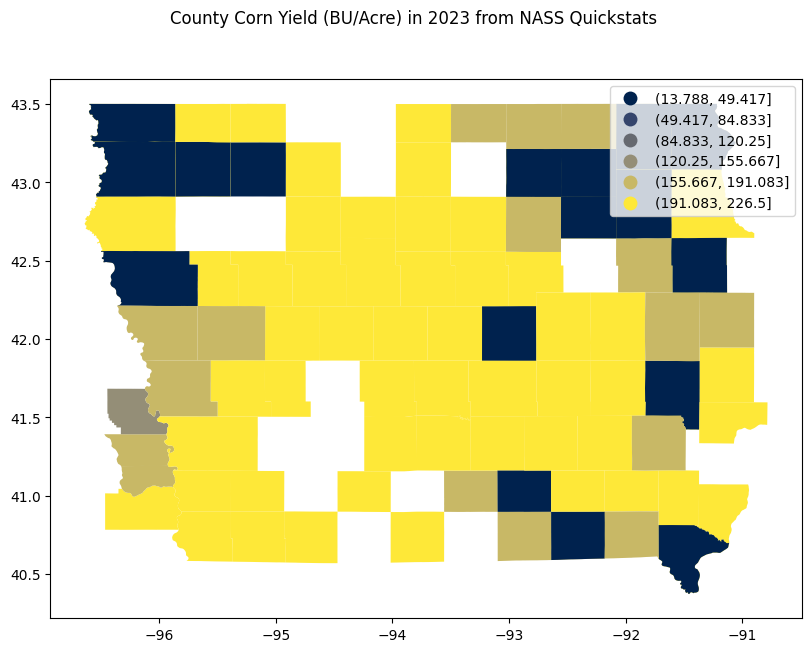

In [161]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

# Define the range for the colormap

# Assuming 'data' is your DataFrame
# Define the number of bins
num_bins = 6
plot_data = data.loc[data.statisticcat_desc == 'YIELD']

# Create bins for the 'Value' column
plot_data['Value_binned'] = pd.cut(plot_data['Value'].str.replace(',', '').astype(float), bins=num_bins)

# Plot the data using the binned values
plot_data.plot(column='Value_binned', cmap='cividis', legend=True, figsize=(10, 7))
# Add super title to the figure
sup_title = "County Corn Yield (BU/Acre) in 2023 from NASS Quickstats"
plt.suptitle(sup_title)
plt.show()

/home/stgilhool/miniconda3/envs/remote_provider/lib/python3.8/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


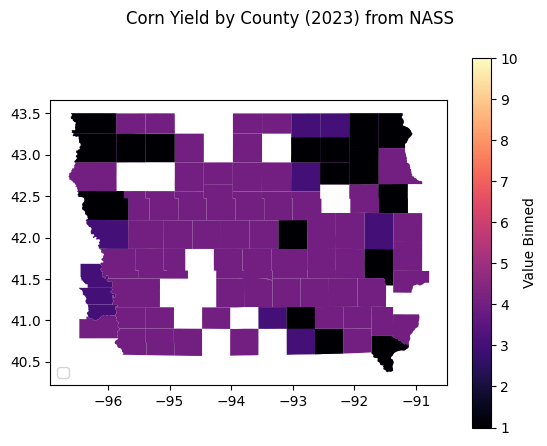

In [144]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import matplotlib.cm as cm

# Define the range for the colormap
norm = Normalize(vmin=1, vmax=10)  # Adjust vmin and vmax as needed

# Assuming 'data' is your DataFrame
# Define the number of bins
num_bins = 5
plot_data = data.loc[data.statisticcat_desc == 'YIELD']

# Create bins for the 'Value' column
plot_data['Value_binned'] = pd.cut(plot_data['Value'].str.replace(',', '').astype(float), bins=num_bins)

# Plot the data using the binned values
ax = plot_data.plot(column='Value_binned', cmap='magma', legend=False, norm=norm)

# Add super title to the figure
sup_title = "Corn Yield by County (2023) from NASS"
plt.suptitle(sup_title)

# Create the colorbar
sm = cm.ScalarMappable(cmap='magma', norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Value Binned')

# Place the legend in the bottom left corner
plt.legend(loc='lower left')

# Show the plot
plt.show()

In [83]:
data['statisticcat_desc'].unique()

array(['AREA PLANTED', 'AREA HARVESTED', 'PRODUCTION', 'YIELD'],
      dtype=object)

/home/stgilhool/miniconda3/envs/remote_provider/lib/python3.8/site-packages/geopandas/plotting.py:644: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  warnings.warn(


<AxesSubplot: >

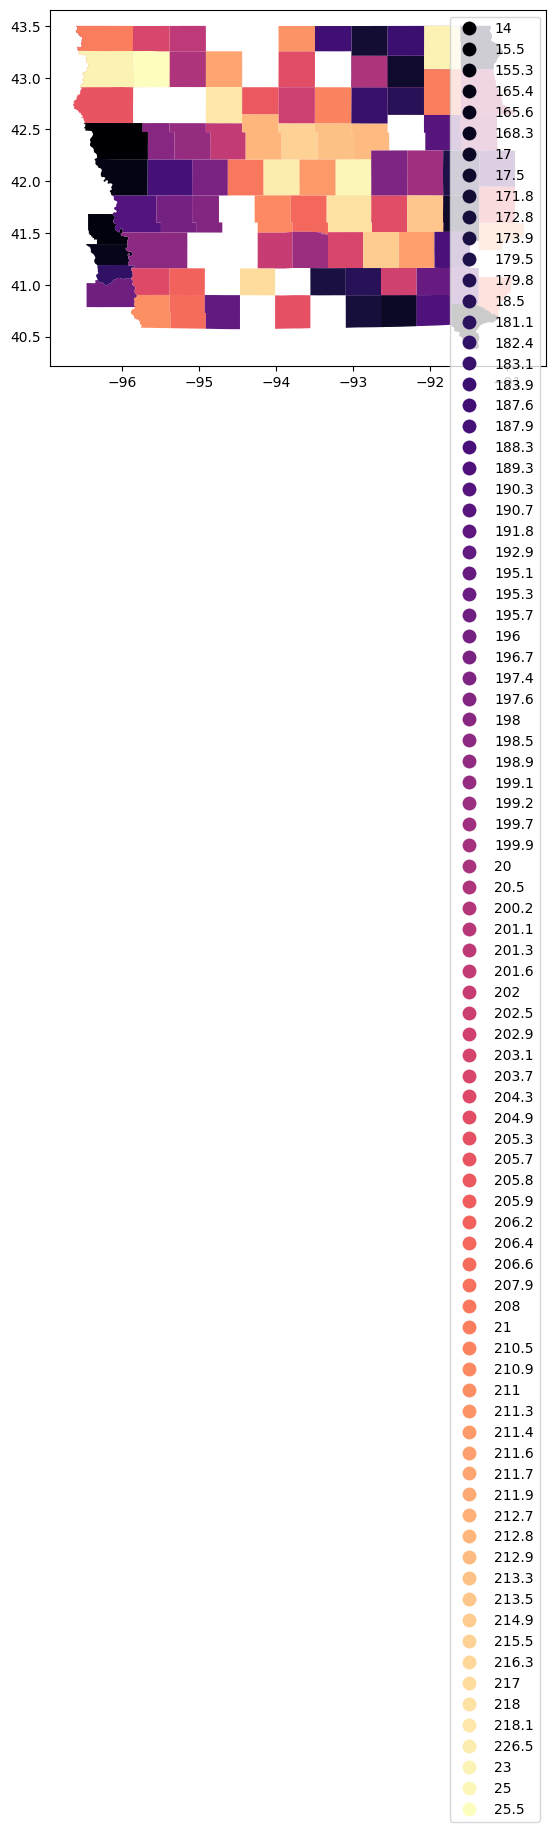

In [118]:
data.loc[data.statisticcat_desc == 'YIELD'].plot(column='Value', cmap='magma', legend=True)

In [153]:
dt = [_datetime(2024, 1, 20), _datetime(2024, 1, 20, 5)]

In [154]:
dt

[datetime.datetime(2024, 1, 20, 0, 0), datetime.datetime(2024, 1, 20, 5, 0)]

In [156]:
colorado_bbox = [-109.0, 36.9, -102.0, 41.0]

In [287]:
test = ds.search(bbox=colorado_bbox) #, datetime=dt)

In [134]:
test['features'][0]['properties']['AQI']

15

In [204]:
ds_view = ds.view('colorado-aqi', bbox=colorado_bbox)

In [205]:
ds_view.save()

ObjectWidget(object_value=[{'alias': 'colorado-aqi', 'name': 'colorado-aqi', 'project': '3391b7537426f6344f75f…

In [ ]:
### Display a FeatureCollection on a map

In [211]:
from ipyleaflet import VectorTileLayer



#layer = VectorTileLayer(name="pm2.5_vector", url=share_url)
m = mapping.Map()
m.add_feature_collection("pm2.5", test, on_click=True)
#m.add_layer(layer)

m

Map(center=[0.0, 0.0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

In [ ]:
### Display a vector tile service on a map

In [206]:
token = ds_view.share_as_ogc_tiles_service(600)
share_url = token.get_ogc_vector_tile_url()

In [202]:
share_url

'https://api.geodesic.seerai.space/ted/api/v1/share/f4723f7c842084d414a7d8065e179402ed13c84adf1f08d36062b05790bdfe0d/collections/airnow/tiles/WebMercatorQuad/{z}/{y}/{x}.mvt'

In [ ]:
### Share to ESRI geoservices

In [200]:
arc_token = ds.share_as_arcgis_service(600)
arcgis_url = arc_token.get_vector_tile_service_url()

In [201]:
arcgis_url

'https://api.geodesic.seerai.space/ted/api/v1/share/315154b4351e30dc0f488d7f5e5c6784f9f3ff6d74af86f843e2c6e935f799e0/rest/services/airnow/VectorTileServer'